# softmax detector

In [2]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation , LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import optimizers
import tensorflow.keras as keras
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets 
from matplotlib.colors import ListedColormap 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set(style='white',color_codes=True)

In [19]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [379]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0.0, 1.0))
    return scaler.fit_transform(data)

In [5]:
def removeOffset(array):  
    return  array - array.mean(axis=0, keepdims=True)

In [6]:
def reshape(data):
    data_scaled = scaleData(data)
    data_scaled = data_scaled.T
    return data_scaled.reshape(3, 300)

In [134]:
def translatePredictionsY(pred):
    pr = np.matrix.round(pred)
    if(pr1[0] == 0.0 and pr): return "Bache"
    if(pr2 > pr1 and pr2 > pr3): return "Tope"
    if(pr3 >pr1 and pr3 > pr2): return "Curva"
    return "Normal"

In [101]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)
def removeOffset(array):  
    return  array - array.mean(axis=0, keepdims=True)

def reshape(data):
    data_scaled = scaleData(data)
    data_scaled = data_scaled.T
    return data_scaled


def createLabeledArray(data_fft, label, ammount):
    array= []
    count = 0
    length = 300
    loop = True
    while loop:
        if(count*length >=ammount):
            loop = False
            break
        a = np.hstack(((reshape(data_fft[count*300 : count*300+length])), label))
        if(count == 0):
            array = a
        else:
            array = np.vstack((array, a))
        count +=1
    return array


def createSections(df,label):
    npArray = np.array([df['Ax'].to_numpy(),df['Ay'].to_numpy(),df['Az'].to_numpy()])
    array=np.array([])
    size = 50 
    count = 0
    length = 300
    while count < npArray.shape[1]:
        a = npArray[0][count:count+size]
        b = npArray[1][count:count+size]
        c = npArray[2][count:count+size]
        Ax = singleRow(a,length)
        Ay = singleRow(b,length)
        Az = singleRow(c,length)
        Ax,Ay,Az = getFFTfrom3DArray(Ax,Ay,Az)
        if(array.shape[0] <=0 ):
            array = np.hstack(  (Ax,Ay,Az, label ) )
        else:
            temp = np.hstack(  (Ax,Ay,Az, label ) )
            array = np.vstack( (array, temp) )
        
        count= count+size 
    return array


def singleRow(numpyArr,length):
    a =numpyArr
    while a.shape[0] <length:
        a = np.hstack( (a,numpyArr)  )
    return a 

def getFFTfrom3DArray(np1,np2,np3):
    o_array1 = removeOffset(np1)
    o_array2 = removeOffset(np2)
    o_array3 = removeOffset(np3)
    fft1= np.square(np.abs(np.fft.rfft(o_array1)))
    fft2= np.square(np.abs(np.fft.rfft(o_array2)))
    fft3= np.square(np.abs(np.fft.rfft(o_array3)))
    return fft1,fft2,fft3




def createSectionsUnlabeled(df):
    npArray = np.array([df['Ax'].to_numpy(),df['Ay'].to_numpy(),df['Az'].to_numpy()])
    array=np.array([])
    size = 50 
    count = 0
    length = 300
    while count < npArray.shape[1]:
        a = npArray[0][count:count+size]
        b = npArray[1][count:count+size]
        c = npArray[2][count:count+size]
        Ax = singleRow(a,length)
        Ay = singleRow(b,length)
        Az = singleRow(c,length)
        Ax,Ay,Az = getFFTfrom3DArray(Ax,Ay,Az)
        if(array.shape[0] <=0 ):
            array = np.hstack(  (Ax,Ay,Az ) )
        else:
            temp = np.hstack(  (Ax,Ay,Az ) )
            array = np.vstack( (array, temp) )
        
        count= count+size 
    return array

In [5]:
healthy = pd.read_csv('anomaly_train_dataset.csv',  usecols=['Ax','Ay','Az'])
baches= pd.read_csv('softmax_baches.csv',  usecols=['Ax','Ay','Az'])
topes = pd.read_csv('softmax_topes.csv',  usecols=['Ax','Ay','Az'])
curvas = pd.read_csv('softmax_curvas.csv',  usecols=['Ax','Ay','Az'])

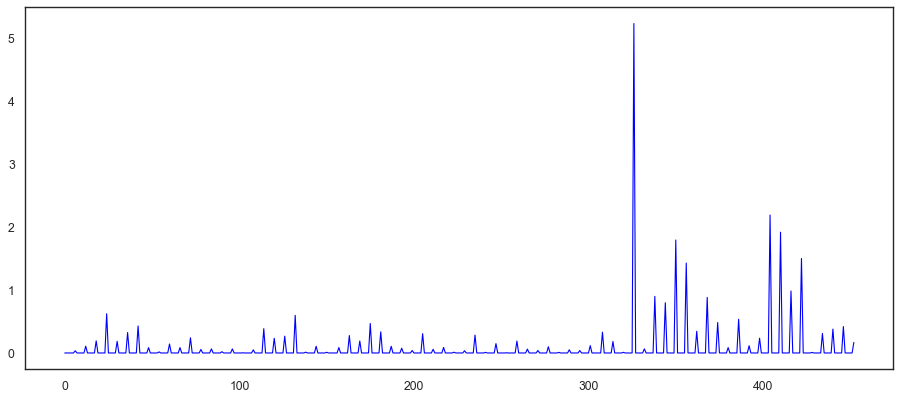

In [7]:
healthyPlotFirst50=  createSectionsUnlabeled(healthy.head(200).tail(50))
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthyPlotFirst50)
ax.plot(range(0,size), healthyPlotFirst50, '-', color='blue', animated = True, linewidth=1) 

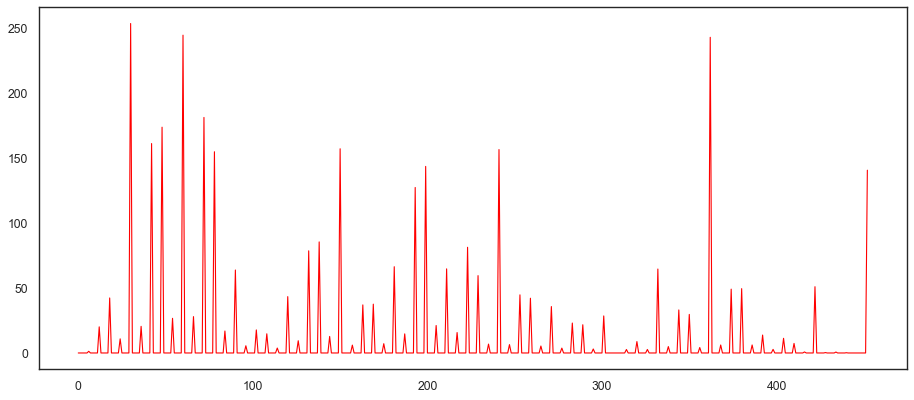

In [8]:
topePlotFirst50=  createSectionsUnlabeled(topes.head(200).tail(50))
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(topePlotFirst50)
ax.plot(range(0,size), topePlotFirst50, '-', color='red', animated = True, linewidth=1) 

In [217]:
label_healthy = np.array([1,0,0,0])
label_bache = np.array([0,1,0,0])
label_tope = np.array([0,0,1,0])
label_curva = np.array([0,0,0,1])

In [218]:
data_healthy_fft = createSections(healthy,label_healthy)  #healthy#
data_baches_fft =createSections(baches,label_bache) #baches #
data_topes_fft = createSections(topes,label_tope) #topes#
data_curvas_fft = createSections(curvas,label_curva) #curvas#

In [385]:
train_both = np.vstack((data_healthy_fft,data_baches_fft,data_topes_fft,data_curvas_fft))
tr_df=pd.DataFrame(train_both)
X = tr_df.iloc[:, :-4]
Y = tr_df.iloc[:,-4:]

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15,  shuffle=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True )
X_train = scaleData(X_train)
X_test = scaleData(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [394]:
#y_train 

array([[0.00475624, 0.08554621, 0.55108237, ..., 0.12652197, 0.75366827,
        0.50201314],
       [0.        , 0.49881198, 0.02057947, ..., 0.03839955, 0.10289613,
        0.38750207],
       [0.02407848, 0.01210827, 0.32004374, ..., 0.38938323, 0.05257712,
        0.02391155],
       ...,
       [0.04162538, 0.00285823, 0.00212925, ..., 0.47460677, 0.02091582,
        0.03525429],
       [0.        , 0.0054412 , 0.04363256, ..., 0.02942255, 0.07673866,
        0.01029832],
       [0.17122473, 0.00454672, 0.02780459, ..., 0.58119771, 0.07104532,
        0.00437276]])

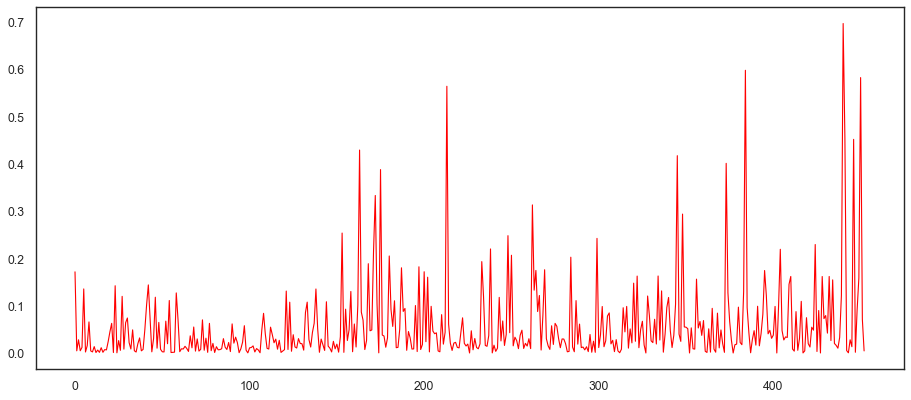

In [397]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(X_train[0])
ax.plot(range(0,size), X_train[5], '-', color='red', animated = True, linewidth=1) 

## Training started

In [295]:
dim = 453 
number_of_neurons_layer1 = 5
number_of_neurons_layer2 = 20 
number_of_neurons_layer3 = 5 
number_of_epochs =30

In [296]:
model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.add(Dense( 4, activation= 'softmax'));
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

def train(data,label):
    model.fit(data, label, epochs=number_of_epochs, batch_size=50, validation_data=(data, label), shuffle=True,callbacks=lr)

def score(data):
    return model.predict(data)

In [297]:
train(X_train,y_train)

Epoch 1/30
5/5 [==============================] - 0s 29ms/step - loss: 1.3844 - accuracy: 0.3012 - val_loss: 1.3571 - val_accuracy: 0.433788520813, 1.3843834400177002
Epoch 2/30
5/5 [==============================] - 0s 6ms/step - loss: 1.3203 - accuracy: 0.4940 - val_loss: 1.2343 - val_accuracy: 0.5823988355636597, 1.3203061819076538
Epoch 3/30
5/5 [==============================] - 0s 5ms/step - loss: 1.1697 - accuracy: 0.5582 - val_loss: 1.0677 - val_accuracy: 0.578348034667969, 1.1696985960006714
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 1.0177 - accuracy: 0.5823 - val_loss: 0.9447 - val_accuracy: 0.598422813415527, 1.0177185535430908
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 0.9091 - accuracy: 0.5904 - val_loss: 0.8289 - val_accuracy: 0.6024929553031921, 0.9090684652328491
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 0.7819 - accuracy: 0.6145 - val_loss: 0.7194 - val_accuracy: 0.6707300043106079, 0.78

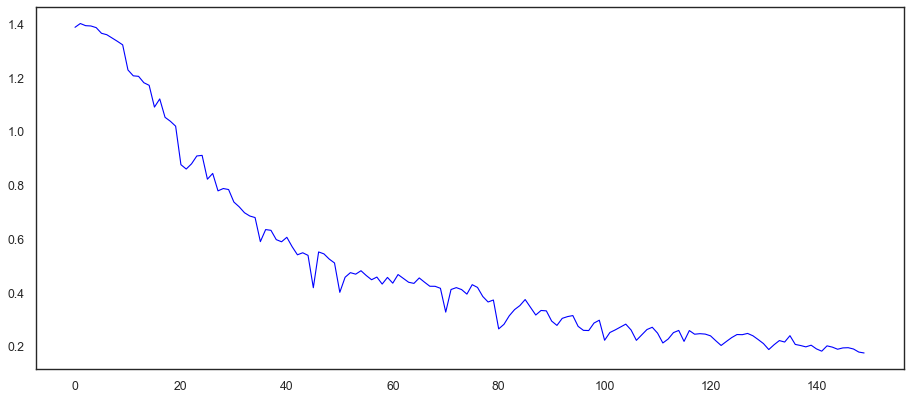

In [425]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)

In [204]:
#model = keras.models.load_model('anomaly_detector_v2_softmax.h5')

In [205]:
#healthy_data =score([a[0][:300],a[1][:300],a[2][:300]])
h = score(X_test)

In [426]:
eval_ = model.evaluate(X_test, y_test) 
print("acuracy of test1:", eval_[1])

2/2 [==============================] - 0s 996us/step - loss: 0.1706 - accuracy: 1.0000
acuracy of test1: 1.0


In [300]:
y_pred = model.predict(X_test)

In [301]:
y_pred_round= np.round(y_pred)

In [303]:
matrix = confusion_matrix( y_test.argmax(axis=1), y_pred_round.argmax(axis=1)).astype(np.float)
matrix_prcntg= np.divide(matrix.T, matrix.sum(axis=1)).T *100

<AxesSubplot:>

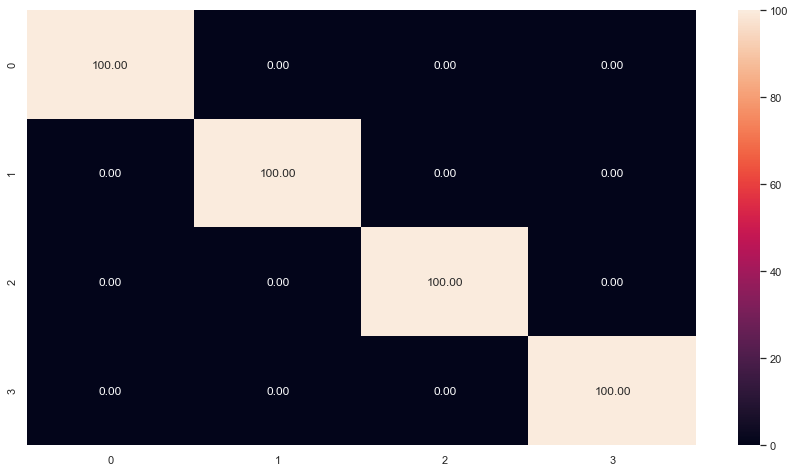

In [304]:
plt.figure(figsize=(15,8))
sns.heatmap(matrix_prcntg, annot=True,fmt=".2f")

In [308]:
f1_score( y_test.argmax(axis=1), y_pred.argmax(axis=1),average='weighted')

1.0

In [328]:
# Plotting scattered points

# Ploting nn softmax results in a scatter plot

In [337]:
X_coso=X_test[:,:150].mean(axis=1) 
Y_coso=X_test[:, 151:301].mean(axis=1) 
Z_coso=X_test[:, 302:453].mean(axis=1)   
y_pred_round= y_pred.argmax(axis=1)
pred_labeled = np.where(y_pred_round==0.0,"Healthy",y_pred_round) 
pred_labeled = np.where(pred_labeled=="1","Pothole",pred_labeled) 
pred_labeled = np.where(pred_labeled=="2","Bump",pred_labeled) 
pred_labeled = np.where(pred_labeled=="3","Curve",pred_labeled) 


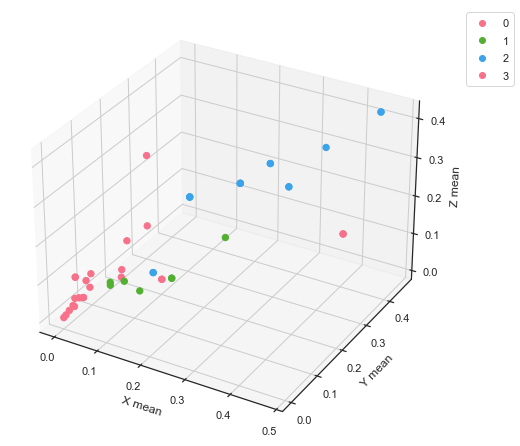

In [339]:
fig = plt.figure(figsize=(6,6))
 
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(X_coso, Y_coso,Z_coso, s=40, marker='o',c=y_pred_round, cmap=cmap,alpha=1)
ax.set_xlabel('X mean')
ax.set_ylabel('Y mean')
ax.set_zlabel('Z mean')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
#plt.legend( ['Healthy', 'Pothole','Bump','Curve'], loc=2) 
plt.show()

In [309]:
model.save('anomaly_detector_final_softmax.h5')

# Recrea exactamente el mismo modelo solo desde el archivo 

In [189]:
#model = keras.models.load_model('anomaly_detector.h5')

## Testing the NN

In [433]:
tope1_test = pd.read_csv('rec_csv_file__curva_3.csv',  usecols=['Ax','Ay','Az']).tail(210).head(20) #al final hay un tope

tope1_test_fft = pd.DataFrame(createSectionsUnlabeled(tope1_test))  #healthy#
tope1_test_fft_scaled = scaleData(tope1_test_fft)
tope1_test_fft_input = tope1_test_fft_scaled.reshape(1, -1)

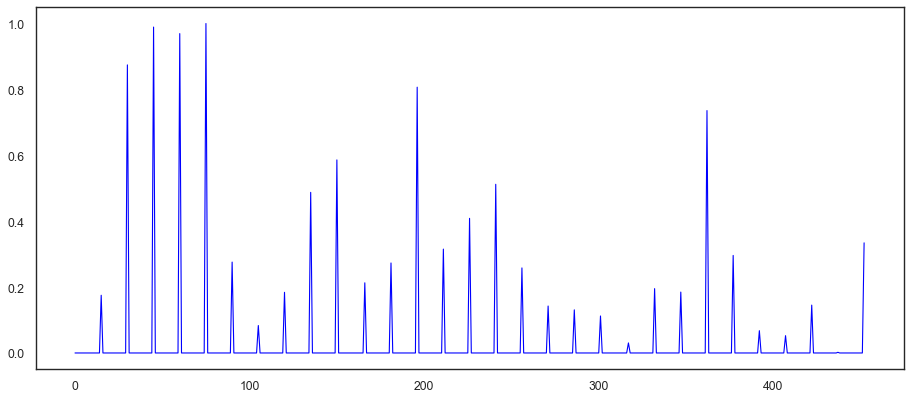

In [434]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(tope1_test_fft_scaled)
ax.plot(range(0,size), tope1_test_fft_scaled, '-', color='blue', animated = True, linewidth=1) 

In [435]:
tope_pred= model.predict(tope1_test_fft_input)
tope_pred.argmax(axis=1)

array([2], dtype=int64)

In [432]:
tope_pred

array([[6.4118183e-01, 1.2076552e-05, 1.0631840e-04, 3.5869980e-01]],
      dtype=float32)

## Test 2

In [411]:
plain1 = pd.read_csv('rec_csv_file_plain_street_1.csv',  usecols=['Ax','Ay','Az']).head(50)
plain1_test_fft = pd.DataFrame(createSectionsUnlabeled(plain1))  #healthy#
plain1_test_fft_scaled = scaleData(plain1_test_fft)
plain1_test_fft_input = plain1_test_fft_scaled.reshape(1, -1)

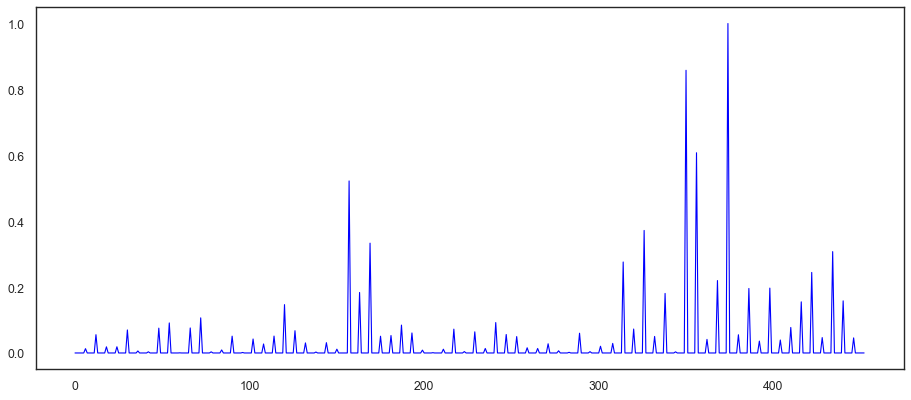

In [412]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(plain1_test_fft_scaled)
ax.plot(range(0,size), plain1_test_fft_scaled, '-', color='blue', animated = True, linewidth=1) 


In [414]:
result2 = score(plain1_test_fft_input) 
np.argmax(result2, axis =0)[:1]

array([0], dtype=int64)